# Example usage

To use `pyxplor` in a project:

In [37]:
import pyxplor
from pyxplor.plot_binary import plot_binary
from pyxplor.plot_categorical import plot_categorical
from pyxplor.plot_numeric import plot_numeric
from pyxplor.plot_time_series import plot_time_series

import seaborn as sns
import os

In [6]:
print(pyxplor.__version__)

0.1.0


In [7]:
taxi = sns.load_dataset("taxis")
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


## Exploring binary features

We'll start by exploring the binary features in our dataset. In our dataset, we have two binary features, `color` and `payment`. If we want to explore and visualize the distribution of these two binary variables, we can utilize the `plot_binary` function.

In [9]:
taxi.color.value_counts()

color
yellow    5451
green      982
Name: count, dtype: int64

In [10]:
taxi.payment.value_counts()

payment
credit card    4577
cash           1812
Name: count, dtype: int64

The current dataset contains null values, so we'll have to drop them first before we apply the `plot_binary` function. This will be updated in a future version as we continue to optimize these functions.

In [11]:
taxi = taxi.dropna()

Now, that we've dropped our null values, we can apply our `plot_binary` function. This function is really simple to use. All the function requires is the dataframe (where the binary variables locate), a list of the binary variables and the plot type (`count` or `pie`). Here's an example.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='count', ylabel='color'>,
        <Axes: title={'center': 'payment'}, xlabel='count', ylabel='payment'>],
       dtype=object))

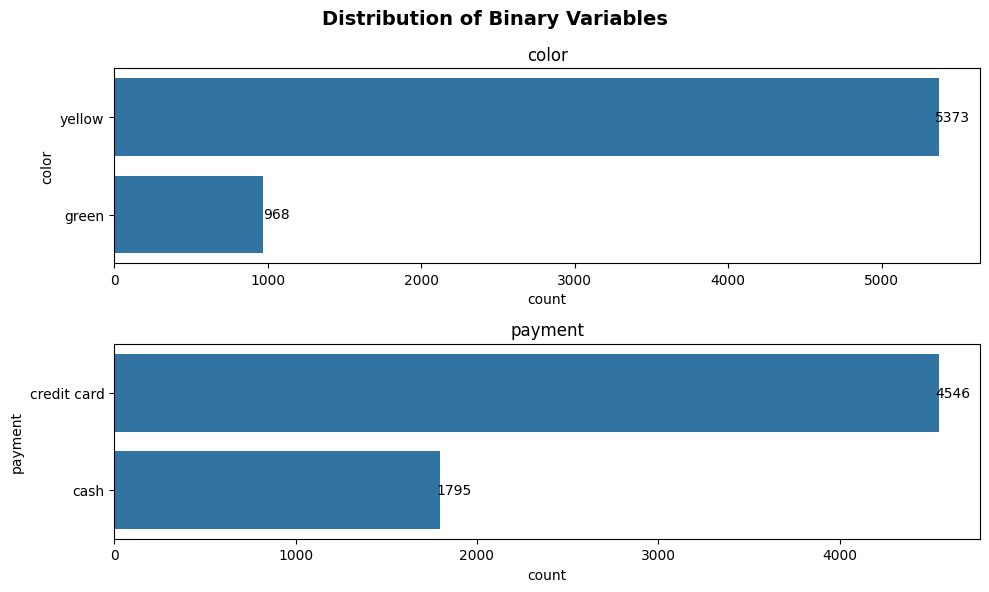

In [12]:
plot_binary(taxi, ['color', 'payment'], 'count')

Ta da! We can see that the function automatically returns the visualization of all of the binary variables specified. The function also adds the labels to the bars automatically, which is a hassle to do in matplotlib. If you prefer visualizing these variables as a pie chart. Just change the parameter of argument `plot_kind` from `count` to `pie`.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'Distribution of color'}>,
        <Axes: title={'center': 'Distribution of payment'}>], dtype=object))

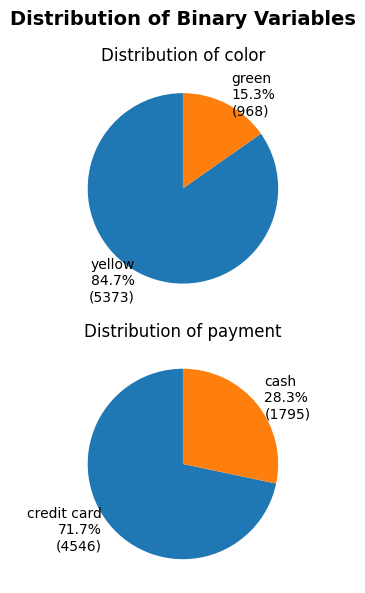

In [13]:
plot_binary(taxi, ['color', 'payment'], 'pie')

Wow! Would you look at that! Now we can even see the percentage of the distribution. Easy right! Next, let's explore the other arguments that will allow you to configure your visualization.

### `label_offset` and `label_fontsize`

The first thing you're allowed to configure is the location and the fontsize of the labels. This is so that you will be allowed to place the labels in a location that you prefer. 

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='count', ylabel='color'>,
        <Axes: title={'center': 'payment'}, xlabel='count', ylabel='payment'>],
       dtype=object))

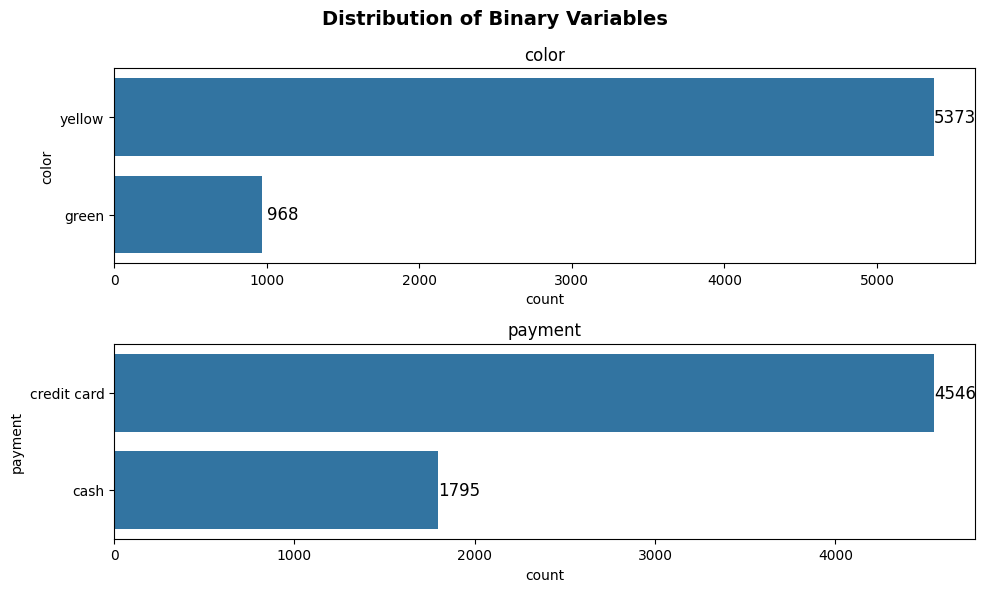

In [21]:
plot_binary(taxi, ['color', 'payment'], 'count', label_offset = 15, label_fontsize = 12)

Since the default plot orientation (can be modified through argument `plot_orientation`) is horizontal (the bars are horizontal), `label_offset` moves the label to the right if it's positive and moves the label to the left if the it's negative.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='count', ylabel='color'>,
        <Axes: title={'center': 'payment'}, xlabel='count', ylabel='payment'>],
       dtype=object))

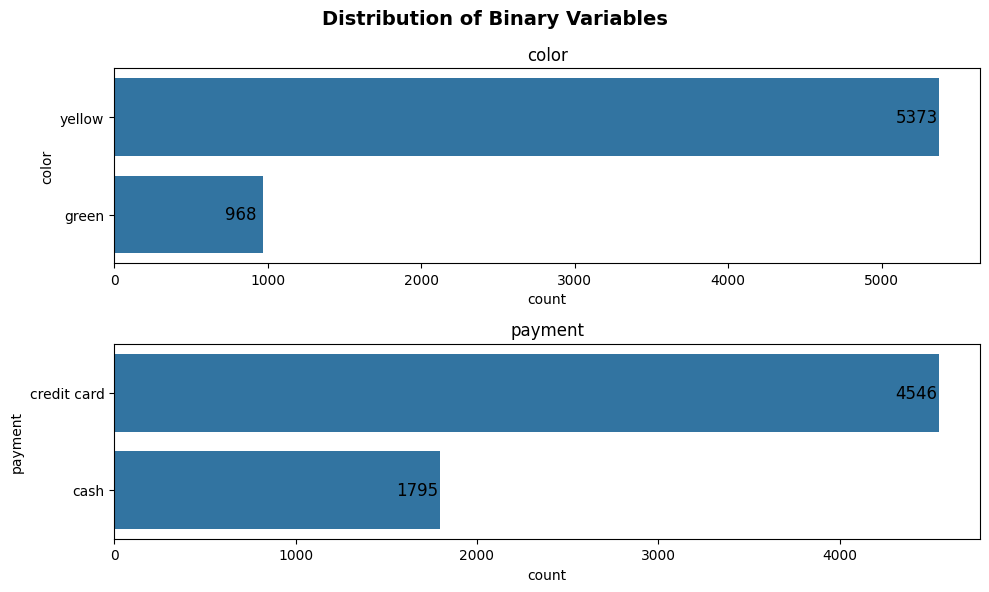

In [23]:
plot_binary(taxi, ['color', 'payment'], 'count', label_offset = -16, label_fontsize = 12)

Note that `label_offset` and `label_fontsize` will only affect the bar chart. These arguments will not affect the labels of the pie chart. This will be a function that we'll add in the future.

### `plot_orientation`

Just now we mentioned that we can modify the `plot_orinetation` to change how the bars are oriented. `plot_orientation` takes on 2 values, `h` or `v`, which stands for horizontal-orientation and vertical-orientation, respectively. Note that this argument also only applies to the bar chart since there's only one type of orientation for pie charts. Below is an example where we switch the default orientation from `h` to `v`.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='color', ylabel='count'>,
        <Axes: title={'center': 'payment'}, xlabel='payment', ylabel='count'>],
       dtype=object))

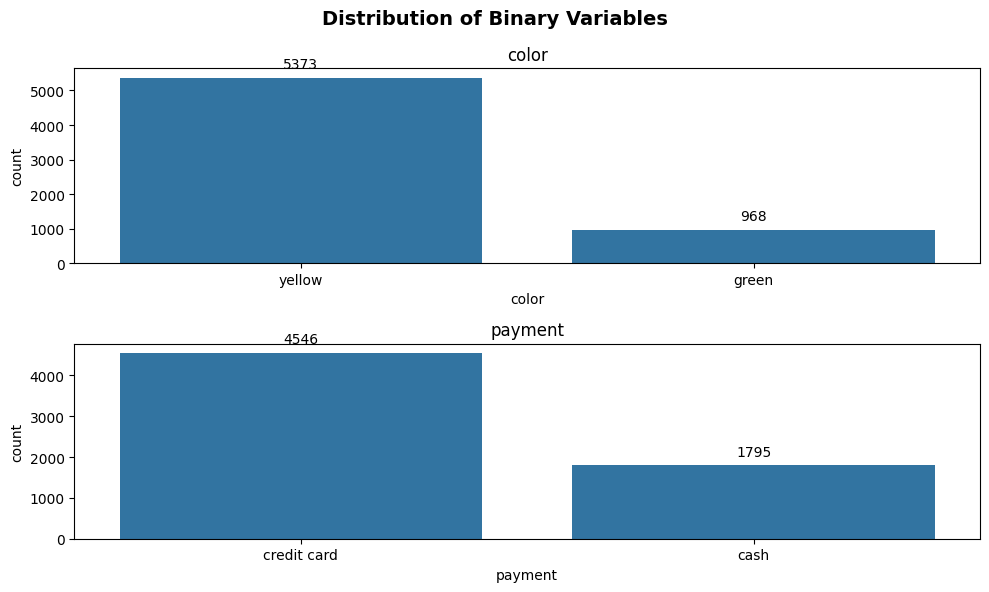

In [29]:
plot_binary(taxi, ['color', 'payment'], 'count', plot_orientation='v')

As we change the orientation from `h` to `v`, the way `label_offset` works also changes. If we set the `label_offset` as a positive value, the labels will go up, whereas if `label_offset` is a negative value, the position will go down.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='color', ylabel='count'>,
        <Axes: title={'center': 'payment'}, xlabel='payment', ylabel='count'>],
       dtype=object))

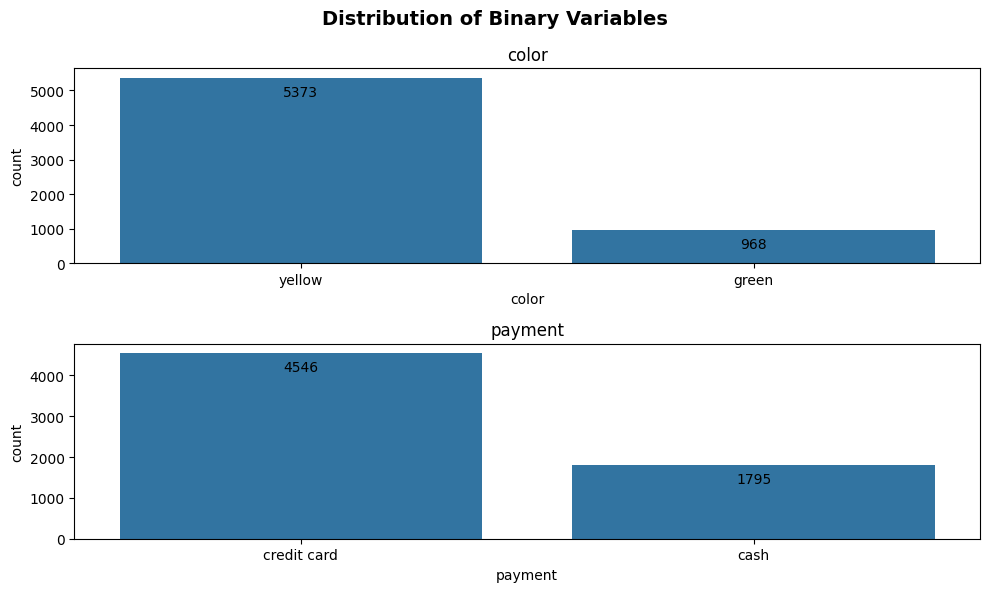

In [32]:
plot_binary(taxi, ['color', 'payment'], 'count', label_offset = -10, plot_orientation='v')

### `figsize`

So you'll notice that the plot above looks a bit compressed because of the figure shape. Don't worry because you'll be able to modify the figure shape with the argument `figsize`. The argument `figsize` takes in a tuple with two values. The first value is the width of your figure and the second value is the height of your figure. Below is an example as we modify the `figsize` so the plot becomes easier to visualize.

(<Figure size 400x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='color', ylabel='count'>,
        <Axes: title={'center': 'payment'}, xlabel='payment', ylabel='count'>],
       dtype=object))

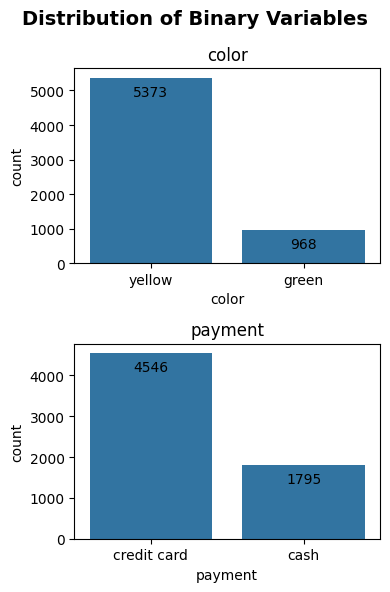

In [34]:
plot_binary(taxi, ['color', 'payment'], 'count', label_offset = -10, plot_orientation='v', figsize=(4, 6))

The plot looks much better now that it's not compressed! Hooray!

### `output`

The next argument is `output`, where we can choose to download the figure for use. This argument takes in a boolean value. The default is `False`, which means that you do not want to download the figure. If you set it as `True`, then it will download the figure to your current path as `binary_variables.png`. 

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='count', ylabel='color'>,
        <Axes: title={'center': 'payment'}, xlabel='count', ylabel='payment'>],
       dtype=object))

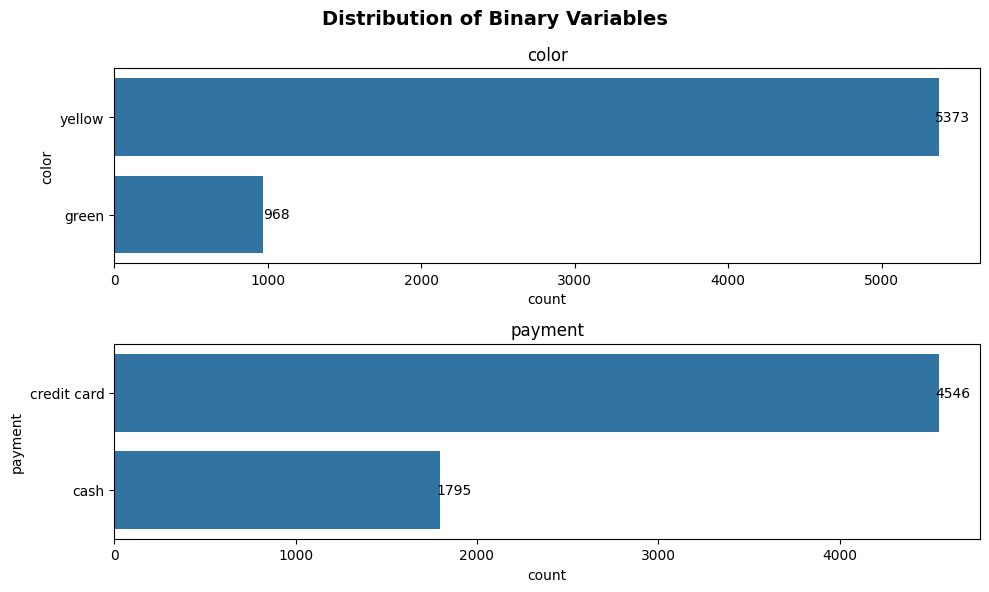

In [35]:
plot_binary(taxi, ['color', 'payment'], 'count', output=True)

If you run the code above, you should notice that the figure is downloaded to the current working directory. We'll remove the figure to clean up the process.

In [38]:
os.remove("binary_variables.png")

### `super_title` and `super_title_font`

Finally, we can modify the super title and its fontsize. The default super title is `Distribution of Binary Variables`. If you have something that you prefer or if you want to change the fontsize of it, you're more than welcome to modify it.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='count', ylabel='color'>,
        <Axes: title={'center': 'payment'}, xlabel='count', ylabel='payment'>],
       dtype=object))

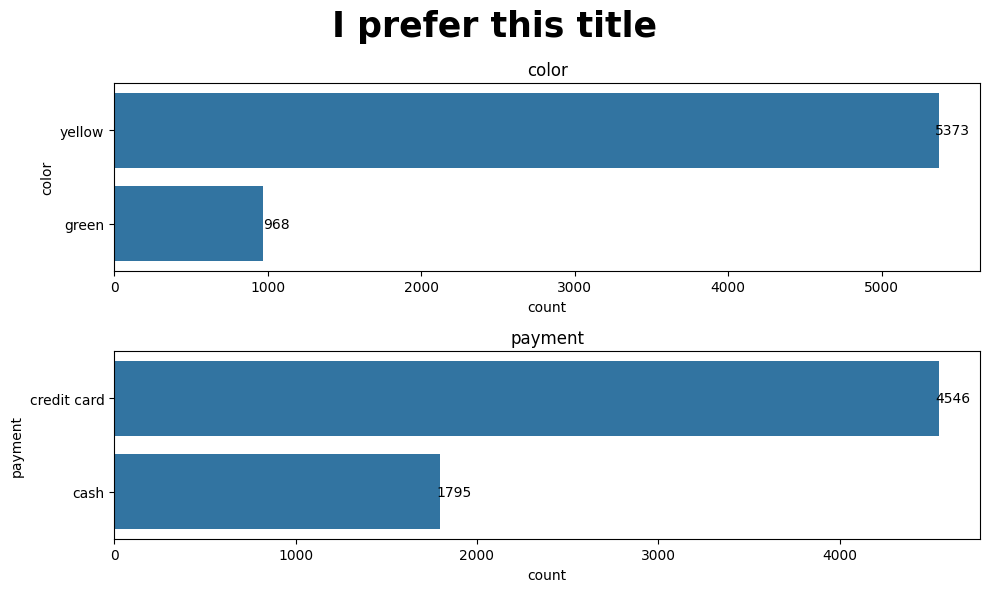

In [40]:
plot_binary(taxi, ['color', 'payment'], 'count', super_title='I prefer this title', super_title_font=25)

As we continue to work on optimizing this function, more flexibility in terms of configuring the appeareance of the plot will be added. Have fun and play around with this function!